In [98]:
import numpy as np
import pandas as pd

In [99]:
data = pd.read_csv("asteroids_data.csv")

In [100]:
data.head()

,Asteroid,Year,Eccentricity,SemiMajorAxis_AU,Velocity_km_s,AngularVelocity_deg_s,Inclination_deg,Diameter_m,Energy_kilotons,Latitude,Longitude,BlastRadius_km,Location
0,Tunguska,1908,0.9,1.0,21.646419,12.838289,0.5,50,4.708040e+05,60.89,101.89,30,Siberia
1,Chelyabinsk,2014,0.7,1.2,15.368648,17.671890,0.4,20,4.725978e+02,54.82,61.11,19,Russia
2,Chicxulub,-65999998,0.1,1.5,18.653608,12.605686,0.2,10000,1.069276e+08,21.40,-89.50,12,Mexico
3,MeteorCrater,-49997,0.2,1.1,16.432634,16.140114,0.3,50,1.036590e+04,35.00,-111.00,15,Arizona


In [101]:
data = data.drop(columns = ["Asteroid","Year","Energy_kilotons","Location","BlastRadius_km"])

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

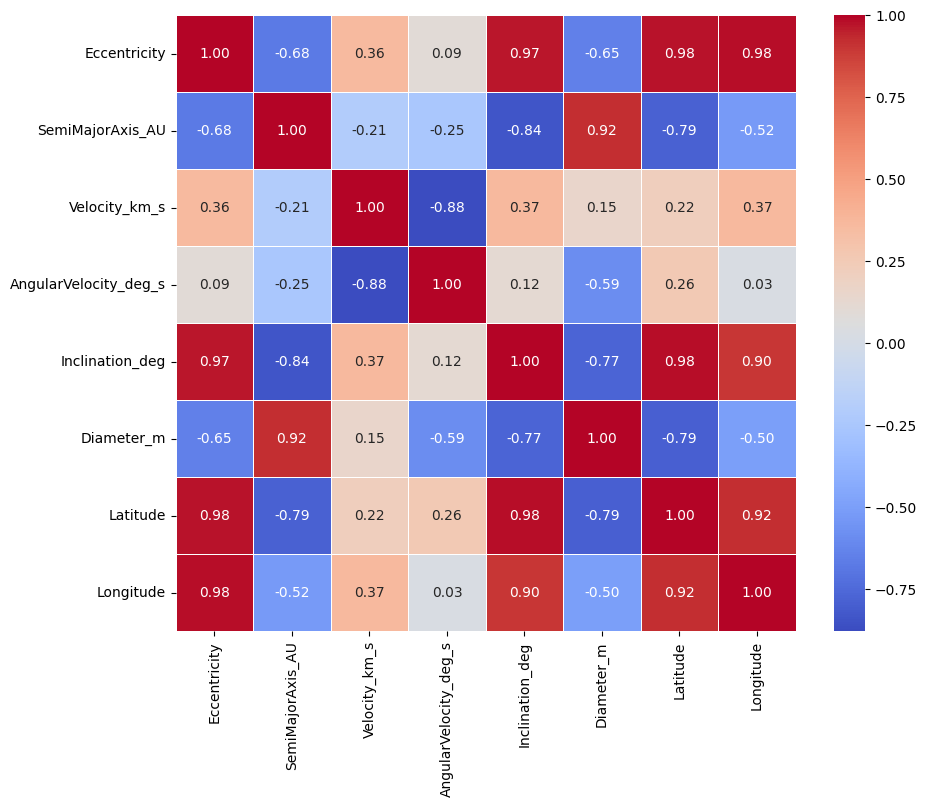

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [104]:
y = data["Longitude"]
x = data.drop(columns = ["Longitude"])

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [107]:
from sklearn.linear_model import LinearRegression
mlon = LinearRegression()
mlon.fit(x_train,y_train)

LinearRegression()

In [108]:
y_pred = mlon.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
print("MAE: ",mae)

MAE:  5.9320231443904134


In [110]:
df = pd.DataFrame({"y_test": y_test, "y_pred" : y_pred})
df

,y_test,y_pred
0,101.89,107.822023


In [111]:
import joblib

In [112]:
joblib.dump(mlon, "model_longitude.pkl")

['model_longitude.pkl']